<h1>ZADATAK 1</h1>

Za početak ćemo učitati bazu podataka o vrstama cveta.

In [239]:
import pandas as pd 
from sklearn import datasets
import plotly.express as px
 
iris = datasets.load_iris()
 
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
df = pd.DataFrame(
    iris.data, 
    columns=iris.feature_names
    )
 
df['target'] = iris.target
df['target_names'] = df['target'].map(target_names)

Dobijeni dataframe sadrži 4 prediktorske varijable koje opisuju 3 vrste cveća.

In [240]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Svaka vrsta cveća ima po 50 opservacija.

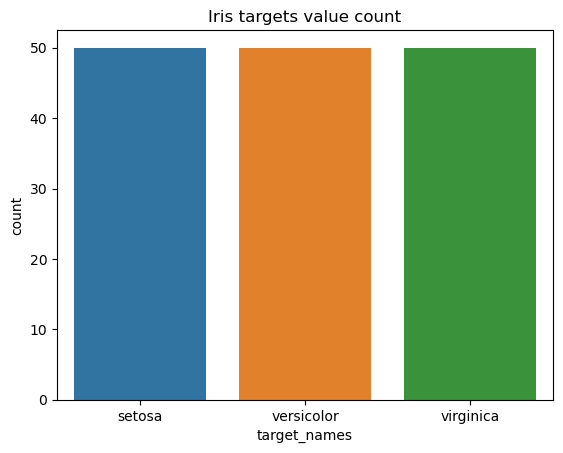

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns 
 
sns.countplot(
    x='target_names', 
    data=df)
plt.title('Iris targets value count')
plt.show()

In [242]:
px.scatter_matrix(df,dimensions=df.columns[:4],color="target_names",height=900)

Da bismo razumeli skup podataka Iris, učitali smo ga kao dataframe. Međutim, da bismo ga učinili upotrebljivijim za Scikit-learn, učitaćemo prediktore i targete kao nizove uskladištene u vidu X i y promenljive.


In [243]:
from sklearn import datasets
 
# load features and targets separately
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [244]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Pošto su karakteristike u skupu podataka Iris na potpuno različitim skalama (npr. dužine latice su mnogo veće od širine listića), moramo ih skalirati tako da nove glavne komponente tretiraju sve varijable podjednako pomoći dekompozicije singularnih vrednosti.

Za ovo će se koristiti StandardScaler.

StandardScaler će standardizovati karakteristike uklanjanjem srednje vrednosti i skaliranjem na jediničnu varijansu tako da svaka varijabla ima μ = 0 i σ  = 1. U osnovi skalira svaku tačku podataka na osnovu Gausove ili normalne distribucije (tj. oduzima srednju vrednost svake varijable od vrednosti odgovarajuće kolone svakog reda, a zatim je deli standardnom devijacijom).


In [245]:
from sklearn.preprocessing import StandardScaler
# data scaling
x_scaled = StandardScaler().fit_transform(X)

Videli smo da skup podataka Iris sadrži 4 prediktora, što ga čini 4-dimenzionalnim skupom podataka.

Nisu svi prediktori nužno korisni za predviđanje. Stoga možemo ukloniti te "noisy features" i napraviti brži model.

PCA je glavni kandidat za ovu vrstu smanjenja dimenzija.

Argument **n_components** će definisati broj komponenti na koje želimo da smanjimo karakteristike.


In [269]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3)
 
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])
pca_df

Shape before PCA:  (150, 4)
Shape after PCA:  (150, 3)


,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
...,...,...,...
145,1.870503,0.386966,0.256274
146,1.564580,-0.896687,-0.026371
147,1.521170,0.269069,0.180178
148,1.372788,1.011254,0.933395


U kodu iznad, možete videti da primena PCA nije uticala na broj redova, ali je uticala na broj kolona, ostavljajući samo 3 umesto 4 kolone.

Pripremićemo PCA dataframe za vizuelizaciju mapiranjem imena targeta uz PCA prediktore.

In [247]:
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df

,PC1,PC2,PC3,target
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa
...,...,...,...,...
145,1.870503,0.386966,0.256274,virginica
146,1.564580,-0.896687,-0.026371,virginica
147,1.521170,0.269069,0.180178,virginica
148,1.372788,1.011254,0.933395,virginica


Objašnjena varijansa, ili svojstvena vrednost, u PCA pokazuje varijansu koja se može pripisati svakoj od glavnih komponenti.

To je niz vrednosti gde je svaka vrednost jednaka varijansi svake glavne komponente, a dužina niza je jednaka broju komponenti definisanih sa n_components.

Može mu se pristupiti pomoću oznake .explained_variance_.

In [248]:
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

Objašnjena varijansa vam govori koliko informacija (varijanse) se može pripisati svakoj od glavnih komponenti. Ovo je važno jer iako možete da konvertujete četvorodimenzionalni prostor u dvodimenzionalni prostor, gubite deo varijanse (informacija) kada to uradite. 

Korišćenjem atributa explained_variance_ratio_, možete videti da prva glavna komponenta sadrži 72.96% varijanse, a druga glavna komponenta sadrži 22.85% varijanse. Zajedno, ove dve komponente sadrže 95,81% informacija.

In [249]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

Možemo nacrtati objašnjenu varijansu da vidimo varijansu svake glavne komponente.


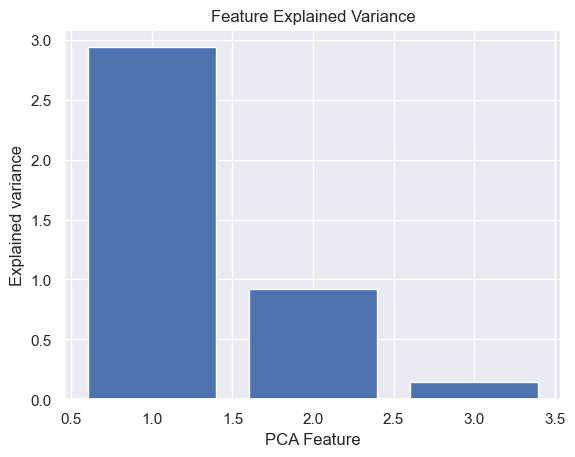

In [250]:
import matplotlib.pyplot as plt 
 
from sklearn.decomposition import PCA
sns.set()
 
# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=3)
 
# Fit and transform data
pca.fit_transform(x_scaled)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

Grafik pokazuje da nam nisu potrebna 3 prediktora, već samo 2. Varijansa 3 prediktora očigledno nije mnogo značajna.

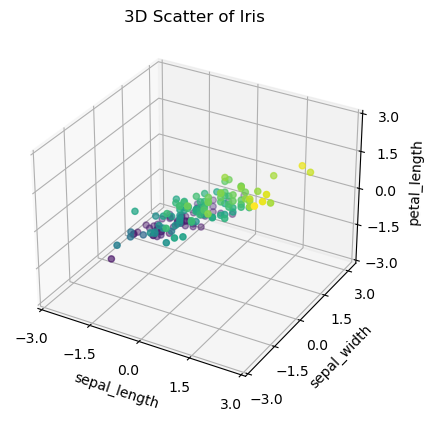

In [267]:
import numpy as np
import matplotlib.pyplot as plt
 
from mpl_toolkits import mplot3d
plt.style.use('default')
 
# Prepare 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')
 
# Plot scaled features
xdata = x_scaled[:,0]
ydata = x_scaled[:,1]
zdata = x_scaled[:,2]
 
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')
 
# Plot title of graph
plt.title(f'3D Scatter of Iris')
 
# Plot x, y, z even ticks
ticks = np.linspace(-3, 3, num=5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
 
# Plot x, y, z labels
ax.set_xlabel('sepal_length', rotation=150)
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length', rotation=60)
plt.show()

Kada se pogleda 3D grafikon, jasnije je da postoji manja varijacija u **petal_length** nego u **sepal_length** ili **sepal_width**, što skoro pa čini 2D sistem unutar 3D grafikona. To pokazuje da je suštinska dimenzija podataka u 2 dimenzije umesto 4.
Smanjenje ova 3 prediktora na 2 ne bi samo učinilo model bržim, već bi vizualizacije učinile informativnijim bez gubitka previše informacija.

Sada, kada znamo da su nam potrebne samo 2 glavne komponente, ponovićemo sve korake koje smo uradili pre samog korišćenja n_components=2.


In [252]:
import pandas as pd
from sklearn.decomposition import PCA
 
# Reduce from 4 to 2 features with PCA
pca = PCA(n_components=2)
 
# Fit and transform data
pca_features = pca.fit_transform(x_scaled)
 
# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])
 
# map target names to PCA features   
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df.tail()


,PC1,PC2,target
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica
149,0.960656,-0.024332,virginica


In [253]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

Zatim ćemo nacrtati dvodimenzionalne glavne komponente na dijagramu raspršenosti.

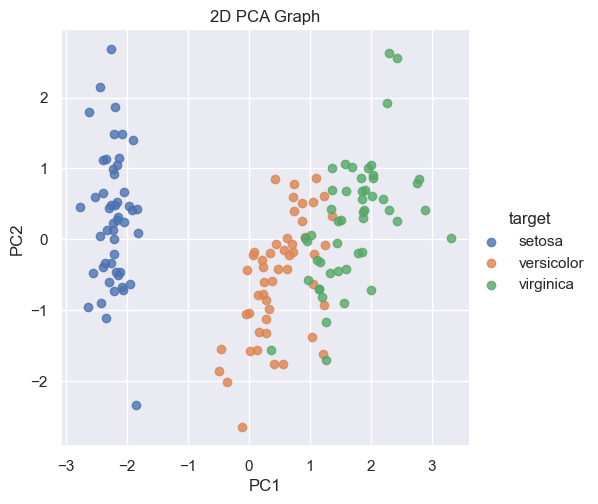

In [254]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

Da bismo razumeli kako svaki prediktor utiče na svaku glavnu komponentu (PC), prikazaćemo korelaciju između prediktora i glavnih komponenti kreiranih pomoću PCA.

In [255]:
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_
 
# Feature names before PCA
feature_names = iris.feature_names
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2
feature_names,,
sepal length (cm),0.521066,0.377418
sepal width (cm),-0.269347,0.923296
petal length (cm),0.580413,0.024492
petal width (cm),0.564857,0.066942


Grafikon pomaže da se razume koji prediktori utiču na koju glavnu komponentu i u kojoj meri.

Usmerenost korelacije prikazana je dodavanjem strelica od početka (0, 0) svakom od koeficijenata.


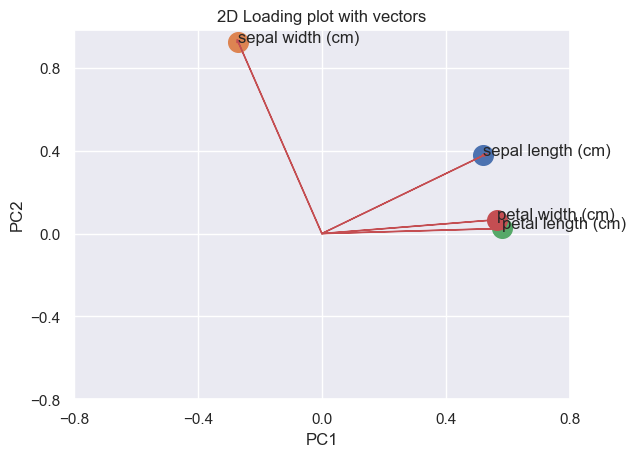

In [256]:
import matplotlib.pyplot as plt 
import numpy as np
 
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()

Čak i ako sve četiri komponente svedemo na samo jednu, izbacujući ogromnih 75% naših originalnih podataka:

In [257]:
# Reduce from 4 to 2 features with PCA
pca = PCA(n_components=1)
 
# Fit and transform data
pca_features = pca.fit_transform(x_scaled)
 
# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1'])
 
# map target names to PCA features   
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df.head()

,PC1,target
0,-2.264703,setosa
1,-2.080961,setosa
2,-2.364229,setosa
3,-2.299384,setosa
4,-2.389842,setosa


In [258]:
pca.explained_variance_ratio_

array([0.72962445])

<AxesSubplot:xlabel='PC1', ylabel='target'>

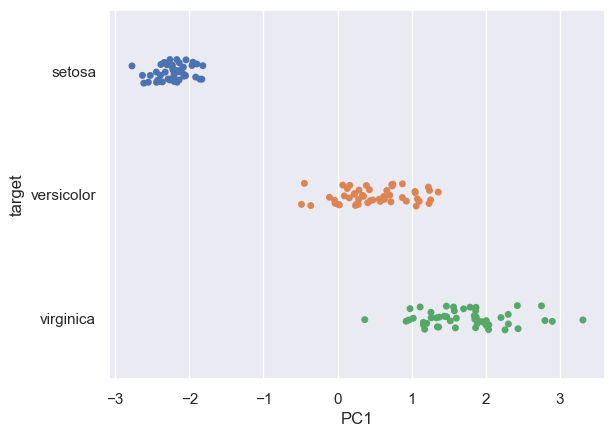

In [259]:
sns.stripplot(data=pca_df, x="PC1", y="target")

<h1> ZADATAK 2 </h1>

In [260]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA , TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.metrics as m
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import skimage as img
import seaborn as sns

load_digits = load_digits()

In [261]:
load_digits.data.shape

(1797, 64)

In [274]:
load_digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Možemo da vizuelizujemo vrednost svih kolona (64) slike kao vrednost 8x8 piksela.

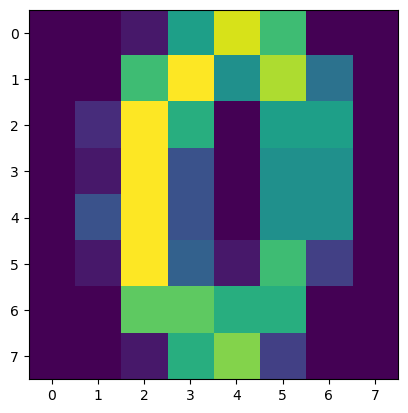

In [278]:
plt.imshow(np.array(load_digits.data[10]).reshape(8,8))
plt.show()

U nastavku imamo .data koji predstavlja prediktor/nezavisnu promenljivu i .target koji predstavlja zavisnu promenljivu.

In [263]:
X = load_digits.data
y = load_digits.target

Varijansa prediktora u odnosu na nezavisnu promenljivu, objašnjava mnogo o odnosu između njih. Imamo listu komponenti uključenih u našu listu preko koje pokušavamo da objasnimo varijansu. Kako se komponente povećavaju, varijansa se takođe povećava.

Prvo, vršimo iteracije niza komponenti da bismo pronašli najbolje podudaranje između varijanse i komponente. I kako primećujemo da se broj komponenti povećava, objašnjena varijansa se takođe povećava, ali nakon određene vrednosti komponente povećanja ne povećavaju objašnjenu varijansu što uzrokuje zasićenje objašnjene varijanse.

Iz rezultata možemo primetiti kako se vrednost varijanse povećava na 1 kada su uključene sve 63 komponente.

In [264]:
variance = []
components = [4,8,12,16,20,24,28,32,63]
for x in list([4,8,12,16,20,24,28,32,63]):
    dimReduction = PCA(n_components=x)
    X_DR_PCA = dimReduction.fit_transform(X)
    print("Explained Variance with", x ," Components: " ,dimReduction.explained_variance_ratio_.sum())
    variance.append(dimReduction.explained_variance_ratio_.sum())
    X_train,X_test,y_train,y_test = train_test_split(X_DR_PCA,y,test_size=0.25)
    RFC_2 = RandomForestClassifier()
    mnb = GaussianNB()
    RFC_2.fit(X_train,y_train)
    mnb.fit(X_train,y_train)
    y_pred = RFC_2.predict(X_test)
    y_prediction = mnb.predict(X_test)
    print("Accuracy Score with Random Forest Classifier",m.accuracy_score(y_test,y_pred))
    print("Accuracy Score with Gaussian NB",m.accuracy_score(y_test,y_prediction))
    print("--------------------------------------------------")

Explained Variance with 4  Components:  0.4871393800853731
Accuracy Score with Random Forest Classifier 0.8422222222222222
Accuracy Score with Gaussian NB 0.7777777777777778
--------------------------------------------------
Explained Variance with 8  Components:  0.673905952280141
Accuracy Score with Random Forest Classifier 0.9444444444444444
Accuracy Score with Gaussian NB 0.9088888888888889
--------------------------------------------------
Explained Variance with 12  Components:  0.7846757566630767
Accuracy Score with Random Forest Classifier 0.9644444444444444
Accuracy Score with Gaussian NB 0.92
--------------------------------------------------
Explained Variance with 16  Components:  0.849396801235402
Accuracy Score with Random Forest Classifier 0.9577777777777777
Accuracy Score with Gaussian NB 0.9311111111111111
--------------------------------------------------
Explained Variance with 20  Components:  0.89430028170367
Accuracy Score with Random Forest Classifier 0.968888888

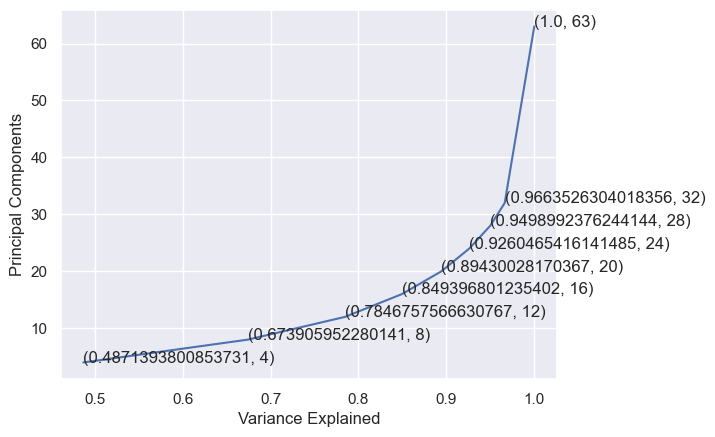

In [265]:
# Plotting variance vs Components
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(variance,components)
for xy in zip(variance, components):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel("Variance Explained")
plt.ylabel("Principal Components")
plt.show()

Iz grafikona vidimo da se objašnjena varijansa postepeno povećava od 0.48 do 0.96 sa komponentama 4 do 32 respektivno. I nakon čega se varijansa objašnjena komponentama zasiti i dostiže 1 kada uključimo sve glavne komponente.

In [266]:
pca_1_Comp = PCA(n_components=24)
X_1 = pca_1_Comp.fit_transform(X)
print("Explained Variance: ",pca_1_Comp.explained_variance_ratio_.sum())
X_train,X_test,y_train,y_test = train_test_split(X_1,y,test_size = 0.2,random_state=1)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_predict = gnb.predict(X_test)
print("Accuracy: ",m.accuracy_score(y_test,y_predict))

Explained Variance:  0.9260591943011036
Accuracy:  0.9361111111111111


Sa 64 vektora prediktora smanjujemo ih na 24,a vidimo da smo u mogućnosti da održavamo dobar model bez gubitka mnogo informacija smanjenjem varijabli koje su u ovom slučaju suvišne. Promene u varijansi se dešavaju u odnosu na broj komponenti, ove promene se polako smanjuju nakon što n_components dostigne 24. Tako možemo dodeliti n_komponenti kao 24, tj. možemo objasniti maksimalnu varijansu od 0.92 sa 24 glavne komponente sa tačnošću od 93%.